In [1]:
import sys
import os
import subprocess
import pandas as pd
import numpy as np
import tempfile
import yaml

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

import os

from datetime import date
print(date.today())
# conda install mkl-service mkl
import mkl
nCPU= 20
N=4

2025-11-24


In [ ]:
import yaml
import subprocess

with open(os.path.join('/mnt/disk7t/xwj/axolotl_rev/script/config.yaml'), 'r') as f:
    config = yaml.safe_load(f)
conda_path = config['paths']['conda']


In [229]:
workdir = '/mnt/disk7t/xwj/axolotl_rev/'
methods = [ 'axo', 'abeille', 'outsingle', 'outrider',]
# script = ['run_abeille.sh', 
#           'run_outsingle.sh', 
#           'run_outrider.sh', 
#           'run_axo.sh']

script = ['parse_task_axo_rerun.py',
          'parse_task_abeille.py', 
          'parse_task_outsingle.py', 
          'parse_task_outrider.py', 
          ]

outputdir = '/mnt/disk7t/xwj/axolotl_rev/result/comput_cost'
figuredir = '/mnt/disk7t/xwj/axolotl_rev/result/figure'

os.system(f'mkdir -p {figuredir} ')
os.system(f'chmod --silent -R 775 {figuredir}')

inputfile = '/mnt/disk7t/xwj/axolotl_rev/result/comput_cost/data_config4.txt' 

df1 = pd.read_csv(inputfile, sep='\t', header=0)
df1

,dataset,sample,gene,config
0,pmuscle_36,36,13573,/mnt/disk7t/xwj/axolotl_rev/result/dataset_pmu...
1,kremer,119,14409,/mnt/disk7t/xwj/axolotl_rev/result/dataset_nc2...
2,pfib_ns,154,13411,/mnt/disk7t/xwj/axolotl_rev/result/dataset_pfi...
3,pfib_ss,269,12369,/mnt/disk7t/xwj/axolotl_rev/result/dataset_pfi...


In [ ]:
# prepare job script
for idx, row in df1.iterrows():
    config = row['config'] 
    task = 0
    conda_cmds = [f'source {conda_path}', 'conda activate py3.12', ]
    for method in methods:
        scriptfile = os.path.join(workdir,'script', script[methods.index(method)])
        logfile = os.path.join(outputdir, method + '_' + row['dataset'] + '.log')
        print(method, scriptfile, logfile, config)
        conda_cmds = conda_cmds + [ f'/usr/bin/time -v -o {logfile} python {scriptfile} {config} {task}',]
    with open(f'{outputdir}/runtime_disease{idx:02d}.job', 'w') as f:
        f.write('\n'.join(conda_cmds))

axo /mnt/disk7t/xwj/axolotl_rev/script/parse_task_axo_rerun.py /mnt/disk7t/xwj/axolotl_rev/result/comput_cost/axo_pmuscle_36.log /mnt/disk7t/xwj/axolotl_rev/result/dataset_pmuscle_36/task_config/t00_M_s36_g13573.config
abeille /mnt/disk7t/xwj/axolotl_rev/script/parse_task_abeille.py /mnt/disk7t/xwj/axolotl_rev/result/comput_cost/abeille_pmuscle_36.log /mnt/disk7t/xwj/axolotl_rev/result/dataset_pmuscle_36/task_config/t00_M_s36_g13573.config
outsingle /mnt/disk7t/xwj/axolotl_rev/script/parse_task_outsingle.py /mnt/disk7t/xwj/axolotl_rev/result/comput_cost/outsingle_pmuscle_36.log /mnt/disk7t/xwj/axolotl_rev/result/dataset_pmuscle_36/task_config/t00_M_s36_g13573.config
outrider /mnt/disk7t/xwj/axolotl_rev/script/parse_task_outrider.py /mnt/disk7t/xwj/axolotl_rev/result/comput_cost/outrider_pmuscle_36.log /mnt/disk7t/xwj/axolotl_rev/result/dataset_pmuscle_36/task_config/t00_M_s36_g13573.config
axo /mnt/disk7t/xwj/axolotl_rev/script/parse_task_axo_rerun.py /mnt/disk7t/xwj/axolotl_rev/result

### GTEx 49 tissues

In [223]:
output_path = f'{workdir}/result/dataset_gtex_nmd'
task_config_path = f'{output_path}/task_config'
tissues_gtex = pd.read_csv(f'{workdir}/gtex_processed/tissues.tsv', sep='\t', index_col=0)
# tissues_gtex['N_SAMPLE'].hist(bins = 10)
# sns.regplot(data=tissues_gtex, x='N_SAMPLE', y='N_GENE')
# tissues_gtex

In [226]:
df2 = tissues_gtex.copy()[['TISSUE_ID','N_SAMPLE','N_GENE']]
# dataset	size	gene	config
df2 = df2.rename(columns={'TISSUE_ID':'dataset', 'N_SAMPLE':'sample', 'N_GENE':'gene'})

buffer = []
for i, row in tissues_gtex.iterrows():
    # print(row)
    ns = row['N_SAMPLE']
    ng = row['N_GENE']
    t = row['TISSUE_ID']
    prefix = f't{i:02d}_{t}_s{ns}_g{ng}' # id, number of samples, number of genes.
    # print(prefix)
    config = os.path.join(task_config_path, f'{prefix}.config')
    buffer.extend([config])
    
df2['config'] = buffer

In [ ]:
# prepare job script
for idx, row in df2.iterrows():
    config = row['config'] 
    task = 0
    conda_cmds = [f'source {conda_path}', 'conda activate py3.12', ]
    for method in methods:
        scriptfile = os.path.join(workdir,'script', script[methods.index(method)])
        logfile = os.path.join(outputdir, method + '_' + row['dataset'] + '.log')
        print(method, scriptfile, logfile, config)
        conda_cmds = conda_cmds + [ f'/usr/bin/time -v -o {logfile} python {scriptfile} {config} {task}',]
        
    with open(f'{outputdir}/runtime_gtex{idx:02d}.job', 'w') as f:
        f.write('\n'.join(conda_cmds))
                
df2.head()

axo /mnt/disk7t/xwj/axolotl_rev/script/parse_task_axo_rerun.py /mnt/disk7t/xwj/axolotl_rev/result/comput_cost/axo_ADPSBQ.log /mnt/disk7t/xwj/axolotl_rev//result/dataset_gtex_nmd/task_config/t00_ADPSBQ_s648_g13675.config
abeille /mnt/disk7t/xwj/axolotl_rev/script/parse_task_abeille.py /mnt/disk7t/xwj/axolotl_rev/result/comput_cost/abeille_ADPSBQ.log /mnt/disk7t/xwj/axolotl_rev//result/dataset_gtex_nmd/task_config/t00_ADPSBQ_s648_g13675.config
outsingle /mnt/disk7t/xwj/axolotl_rev/script/parse_task_outsingle.py /mnt/disk7t/xwj/axolotl_rev/result/comput_cost/outsingle_ADPSBQ.log /mnt/disk7t/xwj/axolotl_rev//result/dataset_gtex_nmd/task_config/t00_ADPSBQ_s648_g13675.config
outrider /mnt/disk7t/xwj/axolotl_rev/script/parse_task_outrider.py /mnt/disk7t/xwj/axolotl_rev/result/comput_cost/outrider_ADPSBQ.log /mnt/disk7t/xwj/axolotl_rev//result/dataset_gtex_nmd/task_config/t00_ADPSBQ_s648_g13675.config
axo /mnt/disk7t/xwj/axolotl_rev/script/parse_task_axo_rerun.py /mnt/disk7t/xwj/axolotl_rev/re

,dataset,sample,gene,config
0,ADPSBQ,648,13675,/mnt/disk7t/xwj/axolotl_rev//result/dataset_gt...
1,ADPVSC,531,13728,/mnt/disk7t/xwj/axolotl_rev//result/dataset_gt...
2,ADRNLG,254,14019,/mnt/disk7t/xwj/axolotl_rev//result/dataset_gt...
3,ARTAORT,424,13793,/mnt/disk7t/xwj/axolotl_rev//result/dataset_gt...
4,ARTCRN,233,13797,/mnt/disk7t/xwj/axolotl_rev//result/dataset_gt...


### run the runtime job in shell. it will take several days

In [ ]:
# script = f'/usr/bin/time -v -o {logfile} python {scriptfile} {config} {task}'
ls runtime*.job \
 | parallel -j 5 --results 20251200_runtime.log \
 'bash {}'

In [ ]:
if False:
  for idx, row in df1.iterrows():
      # print(row)
      config = row['config'] 
      task = 0
      for method in methods:
          scriptfile = os.path.join(workdir,'script', script[methods.index(method)])
          logfile = os.path.join(outputdir, method + '_' + row['dataset'] + '.log')
          # print(method, scriptfile, logfile, config)
          conda_cmds = [ f'source {conda_path}',
                          'conda activate py3.12', 
                        f'/usr/bin/time -v -o {logfile} python {scriptfile} {config} {task}',]
          
          subprocess.run(['bash', '-c', '; '.join(conda_cmds)])
        # f'/usr/bin/time -v -o {logfile} bash {scriptfile} {config}',]
        # /usr/bin/time -v -o $logfile bash $scriptfile $inputfile
        # python ${script} ${task_config} ${task}

In [ ]:
df = pd.concat([df2, df1], keys=['GTEx','Disease',], names= ['type']).reset_index()
df.head()

,type,level_1,dataset,sample,gene,config
0,GTEx,0,ADPSBQ,648,13675,/mnt/disk7t/xwj/axolotl_rev//result/dataset_gt...
1,GTEx,1,ADPVSC,531,13728,/mnt/disk7t/xwj/axolotl_rev//result/dataset_gt...
2,GTEx,2,ADRNLG,254,14019,/mnt/disk7t/xwj/axolotl_rev//result/dataset_gt...
3,GTEx,3,ARTAORT,424,13793,/mnt/disk7t/xwj/axolotl_rev//result/dataset_gt...
4,GTEx,4,ARTCRN,233,13797,/mnt/disk7t/xwj/axolotl_rev//result/dataset_gt...


In [173]:
import pathlib
import re
def parse_time_mem(text: str):
    """
    从 /usr/bin/time -v 的输出里提取
    1. 运行时间（wall clock time）→ 总秒数
    2. 内存峰值（Maximum resident set size）→ MB
    返回 (seconds, MB)
    """
    # 1. 运行时间
    # 支持两种格式：h:mm:ss 或 m:ss
    t = re.search(r'Elapsed.*?:\s+((\d+):)?(\d+):(\d[\d\.]*)', text)
    if not t:
        raise ValueError('无法解析 Elapsed 时间')
    h, m, s = t.group(2), t.group(3), t.group(4)
    h = int(h) if h else 0
    m, s = int(m), float(s)
    elapsed_sec = h * 3600 + m * 60 + s

    # 2. 内存峰值
    m = re.search(r'Maximum resident set size.*?(\d+)', text)
    if not m:
        raise ValueError('无法解析 Maximum resident set size')
    max_rss_kb = int(m.group(1))
    max_rss_mb = max_rss_kb / 1024

    return elapsed_sec, max_rss_mb

df_log = pd.DataFrame(columns = ['method', 'type', 'dataset', 'sample','gene', 'time', 'memory'])
buffer = []  # 收集每一行字典
for idx, row in df.iterrows():
    # print(row)
    config = row['config']
    
    task = 0
    for method in methods:
        scriptfile = os.path.join(workdir,'script', script[methods.index(method)])
        logfile = os.path.join(outputdir, method + '_' + row['dataset'] + '.log')
        
        # print(logfile)
        if os.path.exists(logfile):
            # df_log = pd.read_csv(logfile, sep=':', header=None, skiprows=0)
            src = pathlib.Path(logfile).read_text()
            sec, mb = parse_time_mem(src)
            # print(f'运行时间: {sec:.2f} 秒')
            # print(f'内存峰值: {mb:.2f} MB')
        buffer.append({
            'method': method,
            'type': row['type'],
            'dataset': row['dataset'],
            'sample': row['sample'],
            'gene': row['gene'],
            'time': sec,
            'memory': mb
        })
df_log = pd.concat([ pd.DataFrame(buffer)], ignore_index=True)
df_log = df_log.astype({'sample': 'int32', 'gene': 'int32'})
df_log

,method,type,dataset,sample,gene,time,memory
0,axo,GTEx,ADPSBQ,648,13675,8347.00,8580.246094
1,abeille,GTEx,ADPSBQ,648,13675,27104.00,55810.144531
2,outsingle,GTEx,ADPSBQ,648,13675,411.15,3552.183594
3,outrider,GTEx,ADPSBQ,648,13675,3476.96,7272.582031
4,axo,GTEx,ADPVSC,531,13728,6528.00,6864.945312
...,...,...,...,...,...,...,...
207,outrider,Disease,pfib_ns,154,13411,355.83,2855.371094
208,axo,Disease,pfib_ss,269,12369,1223.13,4319.019531
209,abeille,Disease,pfib_ss,269,12369,5905.00,27882.132812
210,outsingle,Disease,pfib_ss,269,12369,132.42,2748.582031


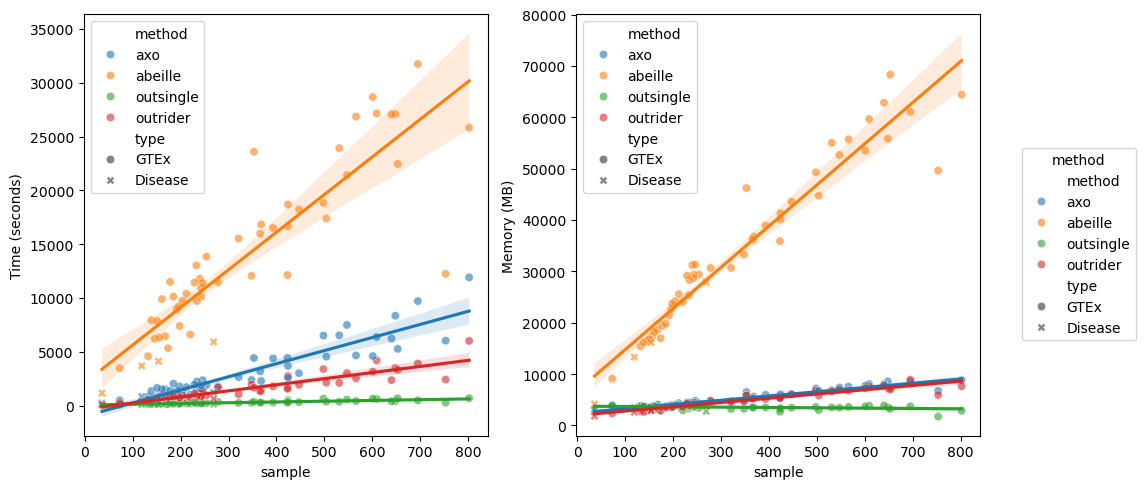

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 1. 散点图
for ax, y_col in zip(axes, ['time', 'memory']):
    sns.scatterplot(data=df_log, x='sample', y=y_col, alpha=0.6,
                    hue='method', style='type', ax=ax, legend='brief')         

# 2. 对每个 method 单独拟合直线
for method, color in zip(df_log['method'].unique(),
                         sns.color_palette(n_colors=df_log['method'].nunique())):
    subset = df_log[df_log['method'] == method]
    for ax, y_col in zip(axes, ['time', 'memory']):
        sns.regplot(data=subset, x='sample', y=y_col,
                    scatter=False,          # 不重复画点
                    label='_nolegend_',     # 避免重复图例
                    color=color,
                    order = 1,
                    ax=ax)
# 3. 取图例
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels,
           loc='center left', bbox_to_anchor=(1.02, 0.5),
           ncol=1, frameon=True, title='method')
axes[0].set_ylabel('Time (seconds)')
axes[1].set_ylabel('Memory (MB)')
plt.tight_layout()
# plt.show()
plt.savefig(f'{figuredir}/runtime.pdf', dpi=300, bbox_inches='tight')